In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import metrics

<IPython.core.display.Javascript object>

In [3]:
file_path = "https://github.com/jhl126/bostonmarathon/blob/master/results/2014/results.csv?raw=true"

<IPython.core.display.Javascript object>

In [4]:
yr_2014 = pd.read_csv(file_path, error_bad_lines=False)

<IPython.core.display.Javascript object>

In [5]:
yr_2014.shape

(31984, 21)

<IPython.core.display.Javascript object>

In [6]:
yr_2014.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


<IPython.core.display.Javascript object>

In [7]:
# around 96% of data is missing for ctz, so drop this column
# additionally, state, city, and country seem to be unimportant, so drop state, city, and country column
# less than 1% of data is missing in city column, so drop na's
yr_2014.isna().mean()

10k          0.000000
name         0.000000
division     0.000000
25k          0.000000
gender       0.000000
age          0.000000
official     0.000000
bib          0.000000
genderdiv    0.000000
ctz          0.961106
35k          0.000000
overall      0.000000
pace         0.000000
state        0.080540
30k          0.000000
5k           0.000000
half         0.000000
20k          0.000000
country      0.000000
city         0.000031
40k          0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [8]:
yr_2014 = yr_2014.drop(columns=["ctz", "state", "city", "name", "bib", "country"])

<IPython.core.display.Javascript object>

In [9]:
yr_2014 = yr_2014.dropna()

<IPython.core.display.Javascript object>

In [10]:
yr_2014.dtypes

10k           object
division       int64
25k           object
gender        object
age            int64
official     float64
genderdiv      int64
35k           object
overall        int64
pace         float64
30k           object
5k            object
half          object
20k           object
40k           object
dtype: object

<IPython.core.display.Javascript object>

In [11]:
# converting objects into floats and getting rid of na values
yr_2014["5k"] = yr_2014["5k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["5k"] = yr_2014["5k"].astype(float)

yr_2014["10k"] = yr_2014["10k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["10k"] = yr_2014["10k"].astype(float)

yr_2014["20k"] = yr_2014["20k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["20k"] = yr_2014["20k"].astype(float)

yr_2014["25k"] = yr_2014["25k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["25k"] = yr_2014["25k"].astype(float)

yr_2014["30k"] = yr_2014["30k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["30k"] = yr_2014["30k"].astype(float)

yr_2014["35k"] = yr_2014["35k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["35k"] = yr_2014["35k"].astype(float)

yr_2014["40k"] = yr_2014["40k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["40k"] = yr_2014["40k"].astype(float)

yr_2014["half"] = yr_2014["half"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["half"] = yr_2014["half"].astype(float)

<IPython.core.display.Javascript object>

In [12]:
# onehot encoding the categorical columns so the data frame can go through pca
cat_cols = ["gender"]
yr_2014 = pd.get_dummies(yr_2014, columns=cat_cols, drop_first=True)
yr_2014.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_M
0,17.37,8,47.67,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,1
1,32.58,1,82.43,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,0
2,16.62,1,45.80,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,1
3,32.57,3,82.43,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,0
4,17.12,2,46.37,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72,1


<IPython.core.display.Javascript object>

## Using KMeans with PCA

In [13]:
scaler = StandardScaler()
X_std = scaler.fit_transform(yr_2014)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

<IPython.core.display.Javascript object>

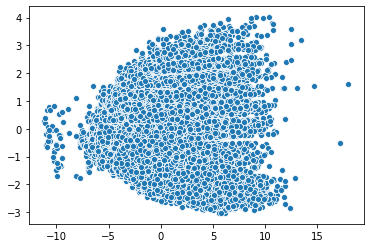

<IPython.core.display.Javascript object>

In [14]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1])

0.3539651559734337


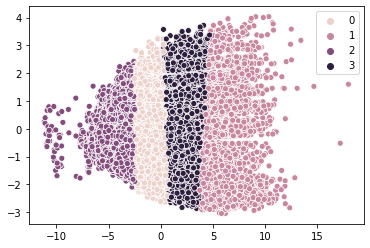

<IPython.core.display.Javascript object>

In [15]:
km = KMeans(n_clusters=4)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = KMeans(n_clusters=4).fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.35788718560722055


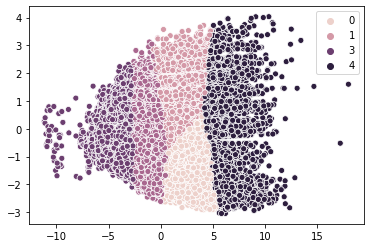

<IPython.core.display.Javascript object>

In [16]:
km = KMeans(n_clusters=5)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = KMeans(n_clusters=5).fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.3651433889013463


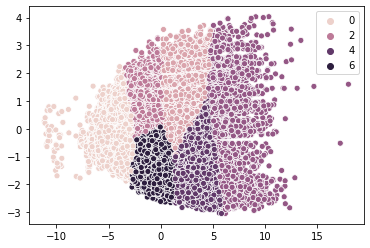

<IPython.core.display.Javascript object>

In [17]:
km = KMeans(n_clusters=6)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = KMeans(n_clusters=6).fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.37393512248102656


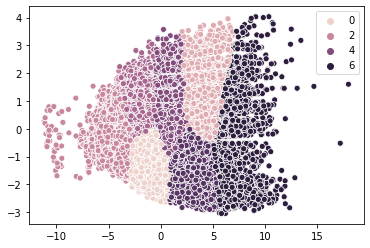

<IPython.core.display.Javascript object>

In [18]:
# 7 clusters has the best silhouette score out of 4-10 clusters
km = KMeans(n_clusters=7)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = KMeans(n_clusters=7).fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.3712859354260138


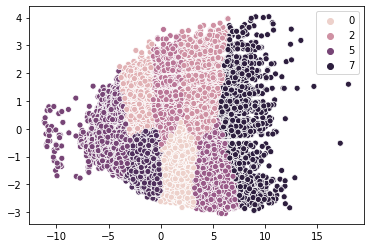

<IPython.core.display.Javascript object>

In [20]:
km = KMeans(n_clusters=8)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = KMeans(n_clusters=8).fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.3642995978436229


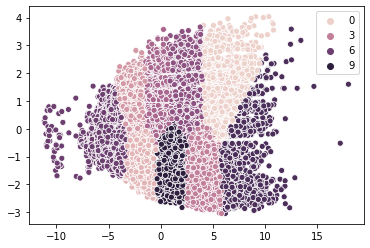

<IPython.core.display.Javascript object>

In [21]:
km = KMeans(n_clusters=9)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = KMeans(n_clusters=9).fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.3590871415537977


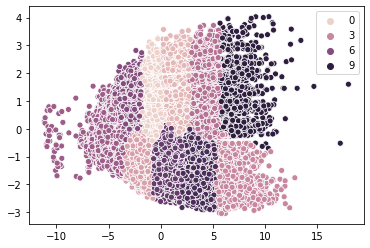

<IPython.core.display.Javascript object>

In [22]:
km = KMeans(n_clusters=10)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = KMeans(n_clusters=10).fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.3738992871477241


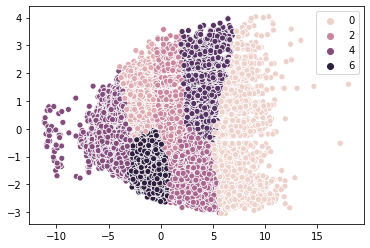

<IPython.core.display.Javascript object>

In [23]:
# 7 clusters has the best silhouette score out of 4-10 clusters
km = KMeans(n_clusters=7)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = KMeans(n_clusters=7).fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

In [26]:
yr_2014["labels"] = km.labels_
clst_means = yr_2014.groupby("labels").mean()
clst_means.style.background_gradient()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_M
labels,,,,,,,,,,,,,,,
0,69.211731,4100.359834,190.254526,40.408696,350.553901,14776.636853,285.608224,30309.404555,13.378406,237.021495,33.761387,155.243031,146.754360,331.710190,0.388820
1,46.995950,832.122748,119.416925,49.550865,213.644018,6615.807665,172.975782,10472.491522,8.156752,145.410450,23.466591,100.129793,94.875964,201.162934,0.790180
2,53.547047,1265.671815,137.630742,50.753567,250.393354,9934.394326,202.054516,19847.437469,9.558494,168.759258,26.674687,114.807418,108.742866,235.802587,0.503441
3,59.001636,4844.047022,153.856345,31.213793,282.557881,11842.164577,228.732075,24827.585266,10.785241,190.003335,29.417975,127.460304,120.706310,266.968768,0.343574
4,40.889562,959.257201,103.139835,36.225535,181.546774,2219.489810,147.923520,3064.016507,6.932505,125.042641,20.475439,86.714896,82.196908,171.227878,0.839650
5,60.727498,1476.402389,160.693197,53.806350,299.945501,13832.570261,241.395898,26852.445143,11.448337,199.539727,29.984995,132.698535,125.558570,282.573213,0.616473
6,48.547123,2422.370077,123.974558,33.005653,221.667264,4900.318070,180.088771,12737.258526,8.462811,151.284098,24.232199,103.719391,98.262367,209.189499,0.194083


<IPython.core.display.Javascript object>

In [48]:
yr_2014["labels"].sort_values().value_counts()

2    5957
4    5937
1    5662
6    5307
3    3190
5    3181
0    2415
Name: labels, dtype: int64

<IPython.core.display.Javascript object>

In [49]:
clst_0 = yr_2014[yr_2014["labels"] == 0]
clst_1 = yr_2014[yr_2014["labels"] == 1]
clst_2 = yr_2014[yr_2014["labels"] == 2]
clst_3 = yr_2014[yr_2014["labels"] == 3]
clst_4 = yr_2014[yr_2014["labels"] == 4]
clst_5 = yr_2014[yr_2014["labels"] == 5]
clst_6 = yr_2014[yr_2014["labels"] == 6]

<IPython.core.display.Javascript object>

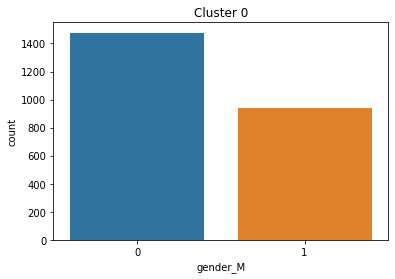

<IPython.core.display.Javascript object>

In [58]:
sns.countplot(x=clst_0["gender_M"], data=clst_0)
plt.title("Cluster 0")
plt.show()

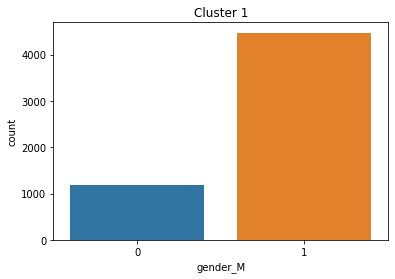

<IPython.core.display.Javascript object>

In [63]:
sns.countplot(x=clst_1["gender_M"], data=clst_1)
plt.title("Cluster 1")
plt.show()

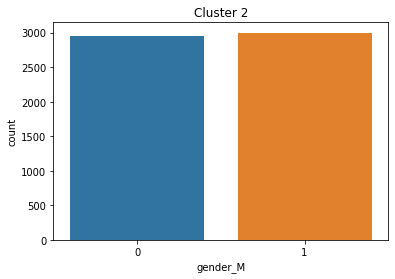

<IPython.core.display.Javascript object>

In [64]:
sns.countplot(x=clst_2["gender_M"], data=clst_2)
plt.title("Cluster 2")
plt.show()

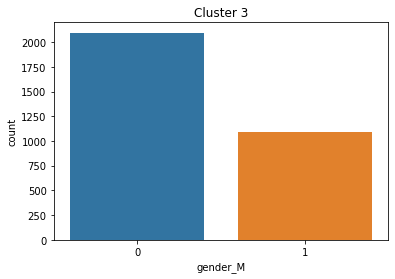

<IPython.core.display.Javascript object>

In [65]:
sns.countplot(x=clst_3["gender_M"], data=clst_3)
plt.title("Cluster 3")
plt.show()

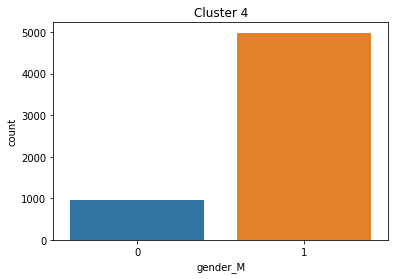

<IPython.core.display.Javascript object>

In [66]:
sns.countplot(x=clst_4["gender_M"], data=clst_4)
plt.title("Cluster 4")
plt.show()

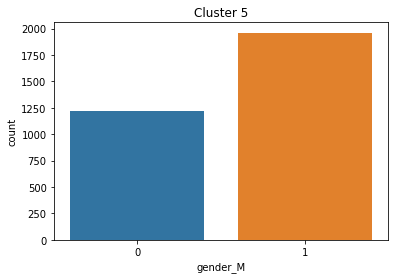

<IPython.core.display.Javascript object>

In [67]:
sns.countplot(x=clst_5["gender_M"], data=clst_5)
plt.title("Cluster 5")
plt.show()

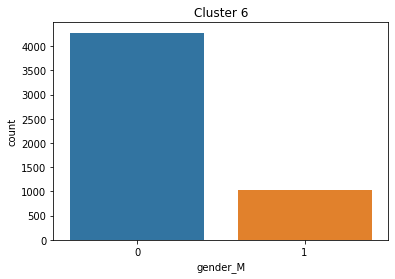

<IPython.core.display.Javascript object>

In [68]:
sns.countplot(x=clst_6["gender_M"], data=clst_6)
plt.title("Cluster 6")
plt.show()

## Using DBSCAN with t-SNE

In [28]:
scaler = StandardScaler()
scaled = scaler.fit_transform(yr_2014)

<IPython.core.display.Javascript object>

In [29]:
tsne = TSNE(n_components=2, perplexity=50)
tsne_results = tsne.fit_transform(scaled)

<IPython.core.display.Javascript object>

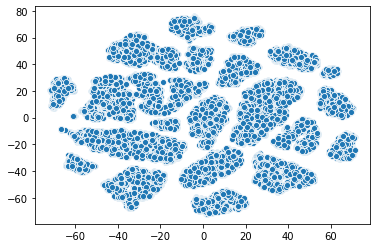

<IPython.core.display.Javascript object>

In [30]:
# hard to tell optimal clusters from tsne plot
sns.scatterplot(tsne_results[:, 0], tsne_results[:, 1])

In [31]:
dbscan_cluster = DBSCAN()
clusters = dbscan_cluster.fit_predict(tsne_results)
for i in range(10, 20):
    dbscan_cluster = DBSCAN(eps=0.5, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(tsne_results)
    print(
        "Number of clusters when min_samples={} is: {}".format(
            i, len(np.unique(clusters))
        )
    )
    labels = DBSCAN(eps=0.5, min_samples=i, metric="euclidean").fit_predict(
        tsne_results
    )
    print(str(len(np.unique(clusters))) + " cluster score: ")
    print(metrics.silhouette_score(tsne_results, labels, metric="euclidean"))

Number of clusters when min_samples=10 is: 753
753 cluster score: 
-0.30417168
Number of clusters when min_samples=11 is: 572
572 cluster score: 
-0.43604594
Number of clusters when min_samples=12 is: 418
418 cluster score: 
-0.54849297
Number of clusters when min_samples=13 is: 302
302 cluster score: 
-0.63781667
Number of clusters when min_samples=14 is: 217
217 cluster score: 
-0.70674723
Number of clusters when min_samples=15 is: 145
145 cluster score: 
-0.75741136
Number of clusters when min_samples=16 is: 104
104 cluster score: 
-0.77959204
Number of clusters when min_samples=17 is: 72
72 cluster score: 
-0.78505766
Number of clusters when min_samples=18 is: 41
41 cluster score: 
-0.7678837
Number of clusters when min_samples=19 is: 32
32 cluster score: 
-0.7377785


<IPython.core.display.Javascript object>

In [32]:
dbscan_cluster = DBSCAN()
clusters = dbscan_cluster.fit_predict(tsne_results)
for i in range(10, 20):
    dbscan_cluster = DBSCAN(eps=0.3, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(tsne_results)
    print(
        "Number of clusters when min_samples={} is: {}".format(
            i, len(np.unique(clusters))
        )
    )
    labels = DBSCAN(eps=0.3, min_samples=i, metric="euclidean").fit_predict(
        tsne_results
    )
    print(str(len(np.unique(clusters))) + " cluster score: ")
    print(metrics.silhouette_score(tsne_results, labels, metric="euclidean"))

Number of clusters when min_samples=10 is: 107
107 cluster score: 
-0.81818616
Number of clusters when min_samples=11 is: 61
61 cluster score: 
-0.8104534
Number of clusters when min_samples=12 is: 33
33 cluster score: 
-0.78560406
Number of clusters when min_samples=13 is: 20
20 cluster score: 
-0.7273292
Number of clusters when min_samples=14 is: 12
12 cluster score: 
-0.65126723
Number of clusters when min_samples=15 is: 8
8 cluster score: 
-0.34039205
Number of clusters when min_samples=16 is: 6
6 cluster score: 
-0.32260227
Number of clusters when min_samples=17 is: 6
6 cluster score: 
-0.32258233
Number of clusters when min_samples=18 is: 5
5 cluster score: 
-0.18952125
Number of clusters when min_samples=19 is: 5
5 cluster score: 
-0.18952125


<IPython.core.display.Javascript object>

In [33]:
dbscan_cluster = DBSCAN()
clusters = dbscan_cluster.fit_predict(tsne_results)

for i in [
    2,
    3,
    4,
    5,
]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(tsne_results)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))
    labels = DBSCAN(eps=i, min_samples=1, metric="euclidean").fit_predict(tsne_results)
    print(str(len(np.unique(clusters))) + " cluster score: ")
    print(metrics.silhouette_score(tsne_results, labels, metric="euclidean"))

Number of clusters when eps=2 is: 25
25 cluster score: 
0.28503174
Number of clusters when eps=3 is: 22
22 cluster score: 
0.2919993
Number of clusters when eps=4 is: 21
21 cluster score: 
0.3378159
Number of clusters when eps=5 is: 18
18 cluster score: 
0.3133727


<IPython.core.display.Javascript object>

In [34]:
dbscan_cluster = DBSCAN()
clusters = dbscan_cluster.fit_predict(tsne_results)

for i in [
    0.1,
    0.3,
    0.5,
    0.6,
    0.7,
    0.8,
    0.85,
    0.9,
    1,
    2,
    3,
    4,
    5,
    6,
]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=5, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(tsne_results)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))
    labels = DBSCAN(eps=i, min_samples=5, metric="euclidean").fit_predict(tsne_results)
    print(str(len(np.unique(clusters))) + " cluster score: ")
    print(metrics.silhouette_score(tsne_results, labels, metric="euclidean"))

Number of clusters when eps=0.1 is: 60
60 cluster score: 
-0.8219081
Number of clusters when eps=0.3 is: 1545
1545 cluster score: 
-0.29168198
Number of clusters when eps=0.5 is: 1295
1295 cluster score: 
0.17384821
Number of clusters when eps=0.6 is: 687
687 cluster score: 
0.13033137
Number of clusters when eps=0.7 is: 294
294 cluster score: 
0.0061749974
Number of clusters when eps=0.8 is: 131
131 cluster score: 
-0.07307391
Number of clusters when eps=0.85 is: 88
88 cluster score: 
-0.08180906
Number of clusters when eps=0.9 is: 66
66 cluster score: 
-0.00018692968
Number of clusters when eps=1 is: 44
44 cluster score: 
0.13793908
Number of clusters when eps=2 is: 25
25 cluster score: 
0.28503174
Number of clusters when eps=3 is: 22
22 cluster score: 
0.2919993
Number of clusters when eps=4 is: 21
21 cluster score: 
0.3378159
Number of clusters when eps=5 is: 18
18 cluster score: 
0.3133727
Number of clusters when eps=6 is: 11
11 cluster score: 
0.09121865


<IPython.core.display.Javascript object>

In [35]:
dbscan_cluster = DBSCAN()
clusters = dbscan_cluster.fit_predict(tsne_results)

for i in [
    0.8,
    0.85,
    0.9,
    1,
    1.1,
    1.2,
    2,
    3,
    4,
    5,
    6,
]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=10, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(tsne_results)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))
    labels = DBSCAN(eps=i, min_samples=10, metric="euclidean").fit_predict(tsne_results)
    print(str(len(np.unique(clusters))) + " cluster score: ")
    print(metrics.silhouette_score(tsne_results, labels, metric="euclidean"))

Number of clusters when eps=0.8 is: 415
415 cluster score: 
0.17108727
Number of clusters when eps=0.85 is: 304
304 cluster score: 
0.1316948
Number of clusters when eps=0.9 is: 198
198 cluster score: 
0.08733148
Number of clusters when eps=1 is: 86
86 cluster score: 
0.10067649
Number of clusters when eps=1.1 is: 49
49 cluster score: 
0.12278232
Number of clusters when eps=1.2 is: 36
36 cluster score: 
0.16808954
Number of clusters when eps=2 is: 25
25 cluster score: 
0.28503174
Number of clusters when eps=3 is: 22
22 cluster score: 
0.2919993
Number of clusters when eps=4 is: 21
21 cluster score: 
0.3378159
Number of clusters when eps=5 is: 18
18 cluster score: 
0.3133727
Number of clusters when eps=6 is: 11
11 cluster score: 
0.09121865


<IPython.core.display.Javascript object>

In [36]:
dbscan_cluster = DBSCAN()
clusters = dbscan_cluster.fit_predict(tsne_results)

for i in [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 3, 4, 5]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=15, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(tsne_results)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))
    labels = DBSCAN(eps=i, min_samples=15, metric="euclidean").fit_predict(tsne_results)
    print(str(len(np.unique(clusters))) + " cluster score: ")
    print(metrics.silhouette_score(tsne_results, labels, metric="euclidean"))

Number of clusters when eps=1 is: 265
265 cluster score: 
0.1629434
Number of clusters when eps=1.1 is: 140
140 cluster score: 
0.14919493
Number of clusters when eps=1.2 is: 67
67 cluster score: 
0.1852733
Number of clusters when eps=1.3 is: 42
42 cluster score: 
0.16133243
Number of clusters when eps=1.4 is: 33
33 cluster score: 
0.24111514
Number of clusters when eps=1.5 is: 29
29 cluster score: 
0.30257812
Number of clusters when eps=1.6 is: 28
28 cluster score: 
0.34424505
Number of clusters when eps=1.7 is: 27
27 cluster score: 
0.34755784
Number of clusters when eps=1.8 is: 26
26 cluster score: 
0.28864902
Number of clusters when eps=1.9 is: 26
26 cluster score: 
0.28864902
Number of clusters when eps=2 is: 25
25 cluster score: 
0.28503174
Number of clusters when eps=3 is: 22
22 cluster score: 
0.2919993
Number of clusters when eps=4 is: 21
21 cluster score: 
0.3378159
Number of clusters when eps=5 is: 18
18 cluster score: 
0.3133727


<IPython.core.display.Javascript object>

#### For DBSCAN with TSNE an espilon of 5 and min_samples of 15 provides the best silhouette score of ~0.39 and results with a total of 18 clusters

In [37]:
dbscan_cluster = DBSCAN(eps=1.7, min_samples=15, metric="euclidean")
clusters = dbscan_cluster.fit_predict(tsne_results)

<IPython.core.display.Javascript object>

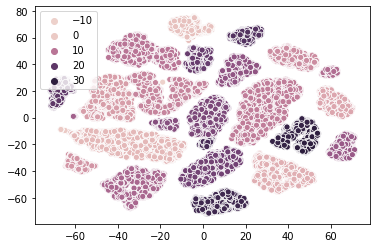

<IPython.core.display.Javascript object>

In [38]:
sns.scatterplot(tsne_results[:, 0], tsne_results[:, 1], hue=dbscan_cluster.labels_)